In [52]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Current date
today = datetime.today().strftime("%m/%d/%Y")
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [87]:
# Target accounts
news_org_twitter_names = ['@BBC','@CBS','@CNN','@FoxNews','@nytimes']
color_names = ['lightskyblue','darkgreen','firebrick','mediumblue','gold']
news_org_names = ['BBC','CBS','CNN','Fox','New York Times']
colors = dict(zip(news_org_names, color_names))

In [92]:
# Create a function for the sentiment analysis of each news org
def get_sentiments(target_user):
    # Variables for holding sentiments
    sentiments = []

    # Counter
    counter = 1

    # Variable for max_id
    oldest_tweet = None
    
    # Loop through 6 pages of tweets (total 120 tweets)
    for x in range(6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Print Tweets
            # print("Tweet %s: %s" % (counter, tweet["text"]))

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            tweets_ago = counter

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
            media_source = target_user[1:]
            if target_user == '@FoxNews': media_source = 'Fox'
            if target_user == '@nytimes': media_source = 'New York Times'
                
            sentiments.append({"Media Sources":media_source,
                               "Compound": compound,
                               "Tweets Ago": counter})

            # Add to counter 
            counter += 1
    return sentiments

In [93]:
sentiments = list()
for target in news_orgs:
    sentiments += get_sentiments(target)

In [94]:
# Convert sentiments to DataFrame# Conve 
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Media Sources,Tweets Ago
0,0.0000,BBC,1
1,0.6249,BBC,2
2,0.0000,BBC,3
3,0.2960,BBC,4
4,-0.3612,BBC,5


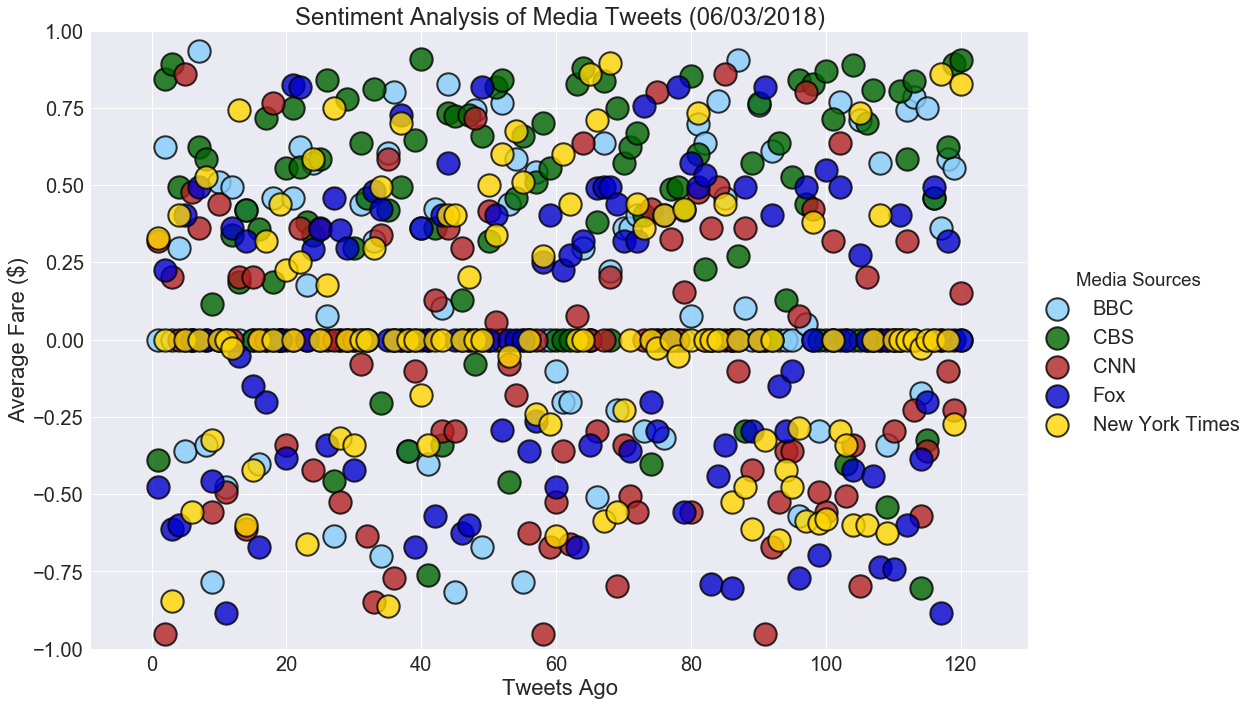

In [95]:
# Plot the sentiments
sns.set_style("darkgrid")
sns.set(font_scale = 2)
# plt.figure(figsize=(50,30))
g = sns.lmplot(x='Tweets Ago',
               y='Compound',
               data=sentiments_pd,
               scatter_kws={'edgecolors':'black',
                            'linewidths':2,
                            'alpha': 0.8,
                            's': 500},             
               hue='Media Sources',
               palette=colors,
               fit_reg=False,
               size=10,
               aspect=1.5,
               legend_out=True)

# set xlim and ylim
g.ax.set_xlim(sentiments_pd['Tweets Ago'].min()-10,sentiments_pd['Tweets Ago'].max()+10)
g.ax.set_ylim(-1,1)
# title, labels
g.ax.set_title(f"Sentiment Analysis of Media Tweets ({today})")
g.ax.set_xlabel("Tweets Ago")
g.ax.set_ylabel("Average Fare ($)")
# g.ax.text(40,37, "Note:\nCircle size correlates with driver count per city.",fontsize=15)
plt.show()